# Taller: Convolución 2D desde cero con NumPy y OpenCV

**Herramientas**: NumPy, OpenCV, Matplotlib

Este notebook implementa una función de convolución 2D desde cero y la compara con `cv2.filter2D`. Se aplican filtros de enfoque, suavizado y detección de esquinas.

In [3]:
# 📦 Importación de librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mostrar imágenes en línea
%matplotlib inline

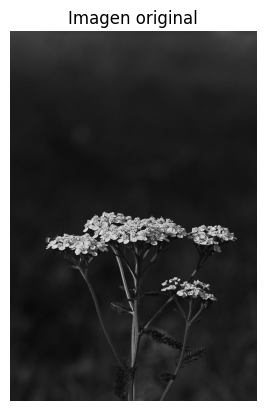

In [4]:
# 📥 Cargar imagen en escala de grises
img = cv2.imread('../datos/flor.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise Exception('No se pudo cargar la imagen. Asegúrate de tener lena.jpg o usa otra imagen.')

plt.imshow(img, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

In [5]:
# 🛠️ Convolución 2D manual
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Voltear el kernel
    output = np.zeros_like(image)
    padded = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+3, j:j+3]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    return output.astype(np.uint8)

In [6]:
# 🔍 Definir kernels
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

blur_kernel = np.ones((3,3), np.float32) / 9

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])

In [7]:
# 🧪 Aplicar convolución manual
sharpened_manual = convolve2d(img, sharpen_kernel)
blurred_manual = convolve2d(img, blur_kernel)

sobel_x_manual = convolve2d(img, sobel_x)
sobel_y_manual = convolve2d(img, sobel_y)
edges_manual = np.clip(sobel_x_manual + sobel_y_manual, 0, 255).astype(np.uint8)

In [8]:
# 🧪 Aplicar filtros con OpenCV
sharpened_cv = cv2.filter2D(img, -1, sharpen_kernel)
blurred_cv = cv2.filter2D(img, -1, blur_kernel)
edges_cv = cv2.add(cv2.Sobel(img, cv2.CV_64F, 1, 0), cv2.Sobel(img, cv2.CV_64F, 0, 1))
edges_cv = np.uint8(np.clip(edges_cv, 0, 255))

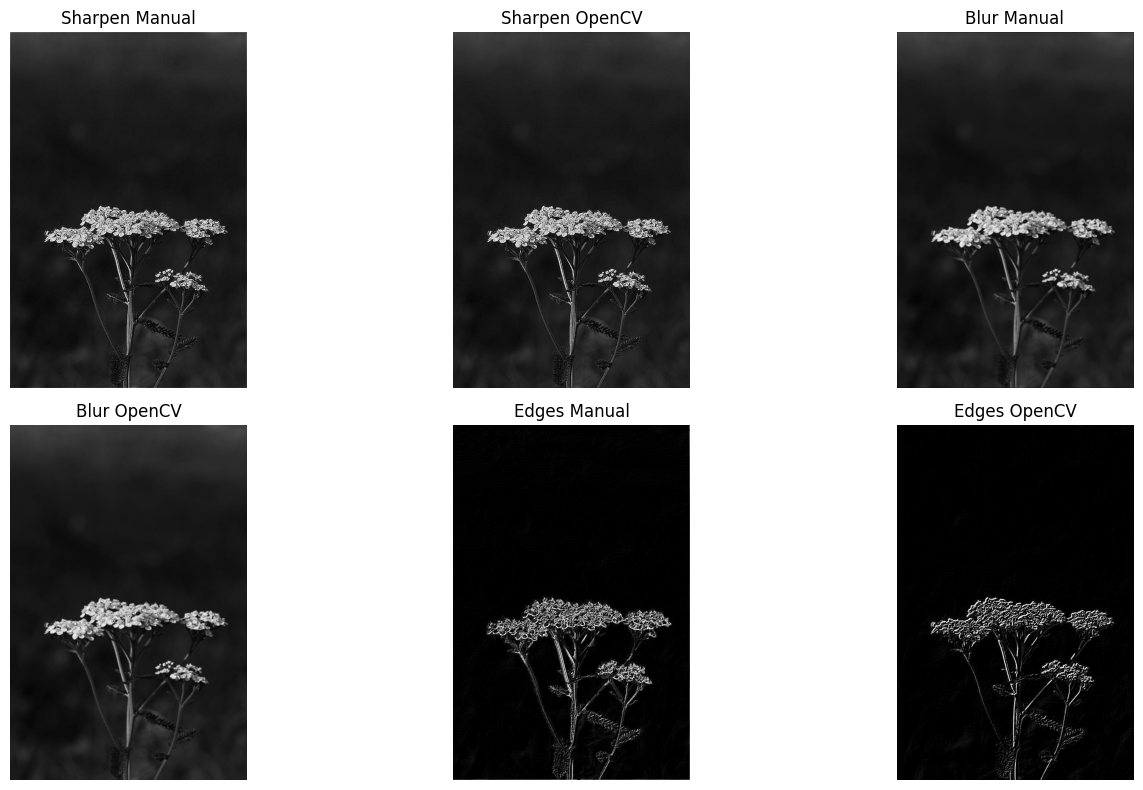

In [9]:
# 🖼️ Mostrar resultados en paralelo
titles = ['Sharpen Manual', 'Sharpen OpenCV', 'Blur Manual', 'Blur OpenCV', 'Edges Manual', 'Edges OpenCV']
images = [sharpened_manual, sharpened_cv, blurred_manual, blurred_cv, edges_manual, edges_cv]

plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🎛️ BONUS: Interfaz interactiva con Trackbars (solo funciona localmente con OpenCV)

In [ ]:
def nothing(x):
    pass

# Crear ventana
cv2.namedWindow('Sharpen Interactivo')
cv2.createTrackbar('Centro', 'Sharpen Interactivo', 5, 10, nothing)
cv2.createTrackbar('Bordes', 'Sharpen Interactivo', 1, 10, nothing)

while True:
    c = cv2.getTrackbarPos('Centro', 'Sharpen Interactivo')
    b = cv2.getTrackbarPos('Bordes', 'Sharpen Interactivo')

    custom_kernel = np.array([[0, -b, 0],
                              [-b, c, -b],
                              [0, -b, 0]])
    result = cv2.filter2D(img, -1, custom_kernel)
    cv2.imshow('Sharpen Interactivo', result)

    if cv2.waitKey(1) & 0xFF == 27:  # Esc para salir
        break

cv2.destroyAllWindows()